# Integration Work
Transmissions over Integrations

In [1]:
from AD_analysis import *
import Atmospheric_diffraction as atm_shift
import numpy as np
import matplotlib as mpl
import Integ_analysis as int_analysis
import Transmission_calculation as trans_calc

The code mainly draws on the following steps, with key variables described:

>analysis=AD_analysis()

This gets the class

====
>analysis.load_band('LR','NIR','IY','H',sampling=1 * u.nm) 

This function loads the MOSAIC wavelengths that will be used for the shift calculations. 

First variable is LR or HR

Second variable is NIR or VIS

Third/fourth variables are the start/end bands. These can be the same, e.g. 'B', 'B'.

====
>analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])

OR
>analysis.load_airmasses(HA_range=[0,1,2],targ_dec= 0 * u.degree)
This function loads the airmasses to calculate the shifts for.

OR
>analysis.load_airmasses(airmasses=[1,1.1,1.2])

Can use 1) zenith angles (ZA_range)
OR 2) hour angles (HA_range); the declination is -25.3 deg by default, change with targ_dec=X
OR 3) raw airmasses (airmasses)

For integrations, only regularly spaced HA vals in 2) makes physical sense

====
>analysis.calculate_shifts(guide * u.micron, aperture_val * u.micron, centred_on=centre_index,reposition = False, parallatic=True)

This function calculates the shifts for the generated wavelengths and airmasses

guide_waveref is the telescope guide wavelength reference

aperturecentre_waveref is the aperture wavelength reference for original position

centirng_index is at which index of the HA_range we centre the aperture on the aperturecentre_waveref

reposition = TRUE or FALSE is a setting that determines whether the aperture is aligned on the aperture wavelength reference for each sequential airmass
For integrations this needs to be false

parallatic = TRUE or FALSE is whether to use the parallatic angle effect. Should be true for physical observations

====
>analysis.make_aperture(type,method="numerical moffat")

This function generates the aperture to use in the transmission calculations

type can be "hexagons" or "circle" to represent the aperture

method can be 1) analytical gaussian, 2) numerical gaussian, 3) numerical moffat, or 4) numerical durham, and determines how the transmission is calculated

====
>analysis.calculate_transmissions()

This function calculates the transmissions for the shifts using one of several methods

====

These functions can be used in many ways for different plots/analysis of transmissions/shifts

Most of these function have other optional variables, e.g., scale for the numerical simulations, whether to change FWHM with airmass and wavelength. These are described in the relevant function notes

## Parallel Mode Graph

In [2]:
#Following function plots integration transmission average for parallel observations
def plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,normalise="no AD",method="numerical moffat",aperture="circle",sample_val=[1*u.nm,1*u.nm],scale_val=0.01,parallatic=True,centring="mid HA",VIS_diameter=0.72*u.arcsec):  
    weights_r = np.arange(0, len(aperture_NIR)+2)
    norm_r = mpl.colors.Normalize(vmin=min(weights_r), vmax=max(weights_r))
    cmap_red = mpl.cm.ScalarMappable(norm=norm_r, cmap=mpl.cm.Purples)
    weights_b = np.arange(0, len(aperture_B)+2)
    norm_b = mpl.colors.Normalize(vmin=min(weights_b), vmax=max(weights_b))
    cmap_blue = mpl.cm.ScalarMappable(norm=norm_b, cmap=mpl.cm.Blues)
    weights_g = np.arange(0, len(aperture_V)+2)
    norm_g = mpl.colors.Normalize(vmin=min(weights_g), vmax=max(weights_g))
    cmap_green = mpl.cm.ScalarMappable(norm=norm_g, cmap=mpl.cm.Greens)
    weights_vr = np.arange(0, len(aperture_R)+2)
    norm_vr = mpl.colors.Normalize(vmin=min(weights_vr), vmax=max(weights_vr))
    cmap_vr = mpl.cm.ScalarMappable(norm=norm_vr, cmap=mpl.cm.Reds)
       
    analysis.load_band("LR","VIS","B","B",sampling=sample_val[0])
    analysis.output['aperture_diameter']=VIS_diameter
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_B,guide,parallatic,centring)
    
    plt.figure(figsize=[7,5])
    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='Aperture Centre = {}'.format(aperture_B[count]),color=cmap_blue.to_rgba(len(aperture_B)-count))
        plt.plot(analysis.output['wavelengths'],opt_transmission,color='black',linestyle='--')
        
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_B[count]),color=cmap_blue.to_rgba(len(aperture_B)-count))

    analysis.load_band("LR","VIS","V","V",sampling=sample_val[0])
    analysis.output['aperture_diameter']=VIS_diameter
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_V,guide,parallatic,centring)
    
    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='Aperture Centre = {}'.format(aperture_V[count]),color=cmap_green.to_rgba(len(aperture_V)-count))
        plt.plot(analysis.output['wavelengths'],opt_transmission,color='black',linestyle='--')
        
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_V[count]),color=cmap_green.to_rgba(len(aperture_V)-count))
            
    analysis.load_band("LR","VIS","R","R",sampling=sample_val[0])
    analysis.output['aperture_diameter']=VIS_diameter
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_R,guide,parallatic,centring)

    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='Aperture Centre = {}'.format(aperture_R[count]),color=cmap_vr.to_rgba(len(aperture_R)-count))
        plt.plot(analysis.output['wavelengths'],opt_transmission,color='black',linestyle='--')
        
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_R[count]),color=cmap_vr.to_rgba(len(aperture_R)-count))

    analysis.load_band("LR","NIR","IY","H",sampling=sample_val[1])
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_NIR,guide,parallatic,centring)

    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='Aperture Centre = {}'.format(aperture_NIR[count]),color=cmap_red.to_rgba(len(aperture_NIR)-count))
        plt.ylabel("Mean Transmission")        
        plt.plot(analysis.output['wavelengths'],opt_transmission,label='No AD Transmission',color='black',linestyle='--')
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_NIR[count]),color=cmap_red.to_rgba(len(aperture_NIR)-count))
        plt.axhline(y=1,label='No AD Transmission, {}'.format(analysis.input['method']),color='black',linestyle='--')
        plt.ylabel("Mean Transmission Relative to No AD")
        
    plt.ylim(0,1.1)
    plt.xlabel("Wavelength (nm)")
    plt.axvline(x=guide.value*1000,color='black',linewidth=0.7,label='Guide Wavelength')
    #if analysis.input['HA_range'] != []:
        #plt.title("Guide = {}, HA {}-{}, Dec = {}, Centre at = {}h".format(guide,analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],analysis.input['HA_range'][analysis.input['centred_on']]))
    plt.legend()

# Various Cosmo Fields
Some cosmo fields are below from HA -1 to 1h.

These are not optimised, as are (falsely) simulating all 3 VIS bands at once. See Optimisation part further below for better cases

## GOODS-S

Target goes below Horizon above/below HA of +/- 6.9h
Target goes below Horizon above/below HA of +/- 6.9h
Target goes below Horizon above/below HA of +/- 6.9h
Target goes below Horizon above/below HA of +/- 6.9h
Target goes below Horizon above/below HA of +/- 6.9h


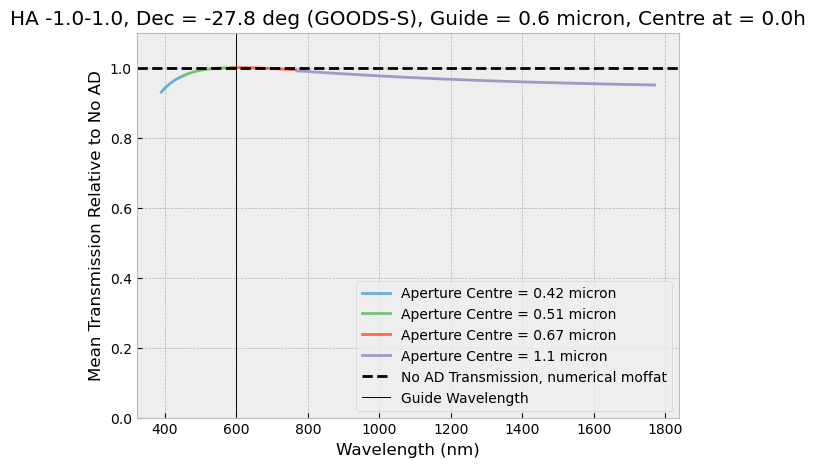

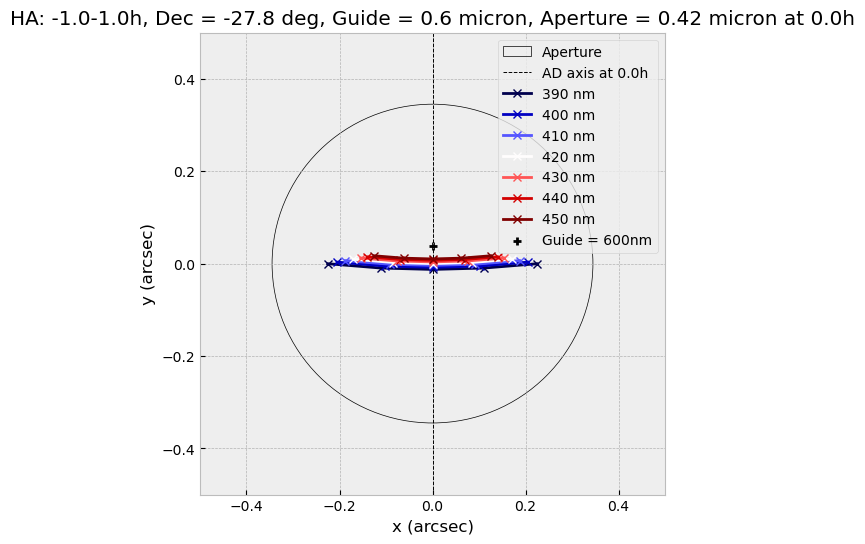

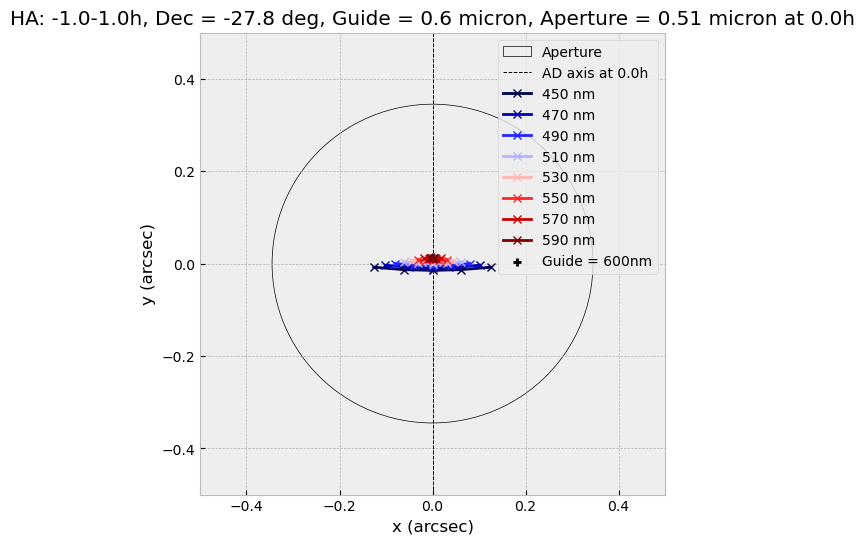

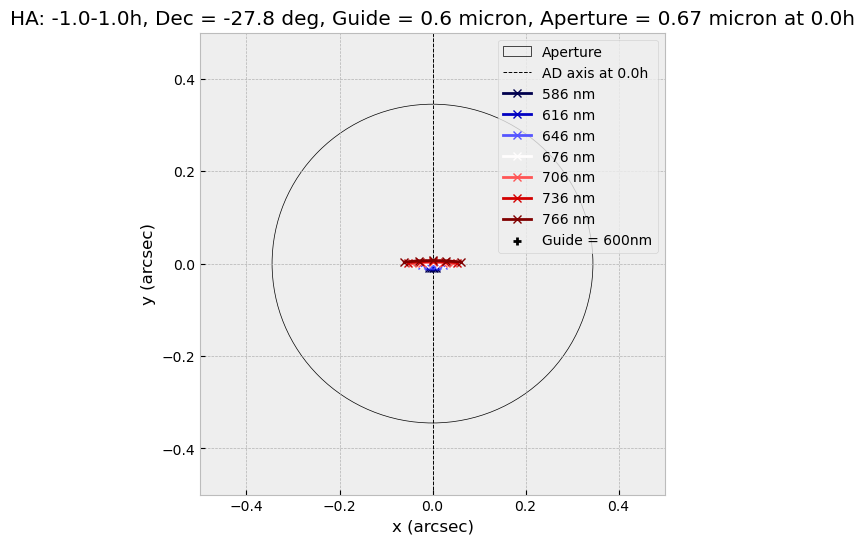

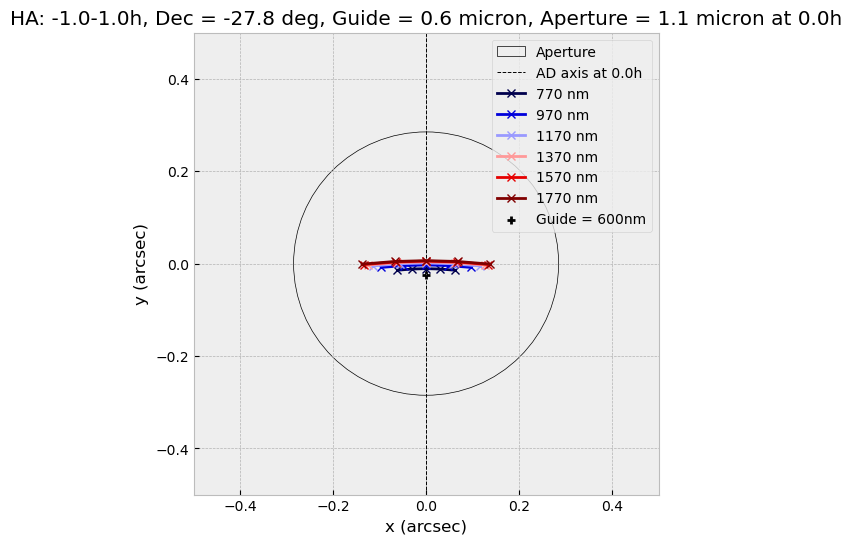

In [3]:
analysis=AD_analysis()
HA_range=np.linspace(-1,1,21)
targ_dec=-27.8*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.51]*u.micron
aperture_R=[.67]*u.micron
aperture_NIR=[1.1]*u.micron
guide=.6*u.micron


analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring)
plt.title("HA {}-{}, Dec = {} (GOODS-S), Guide = {}, Centre at = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm)
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm)
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

## COSMOS

Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h


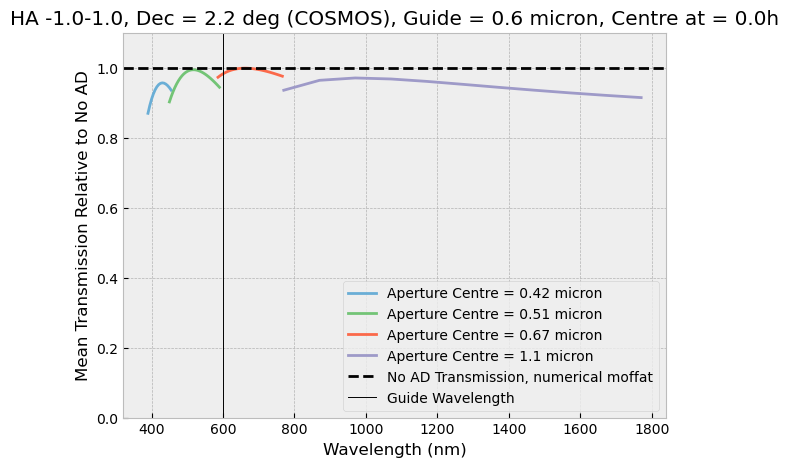

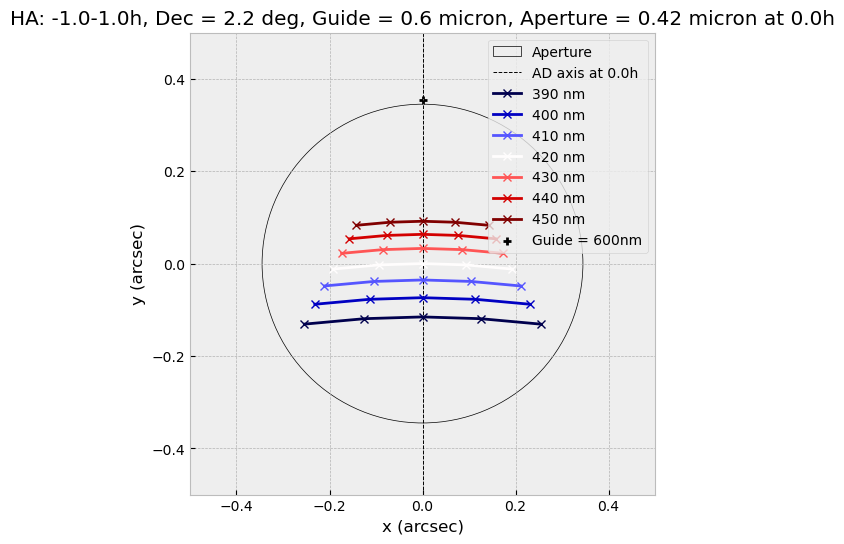

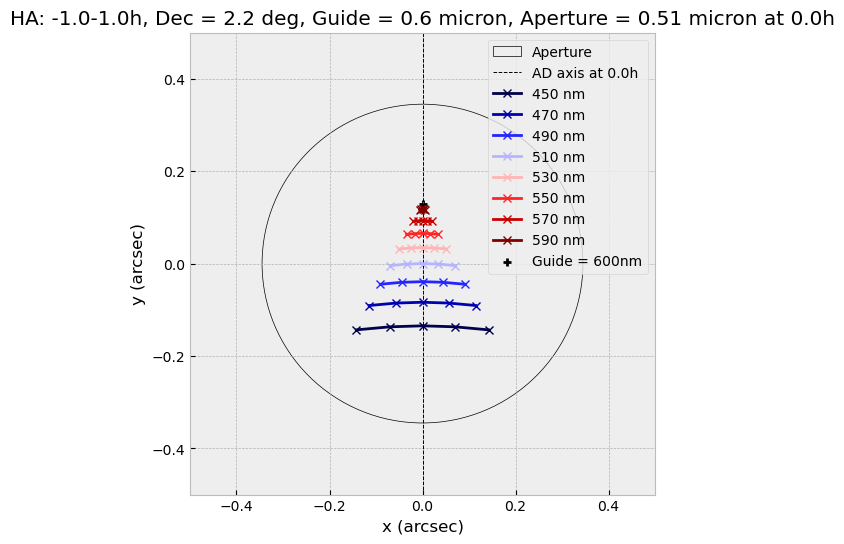

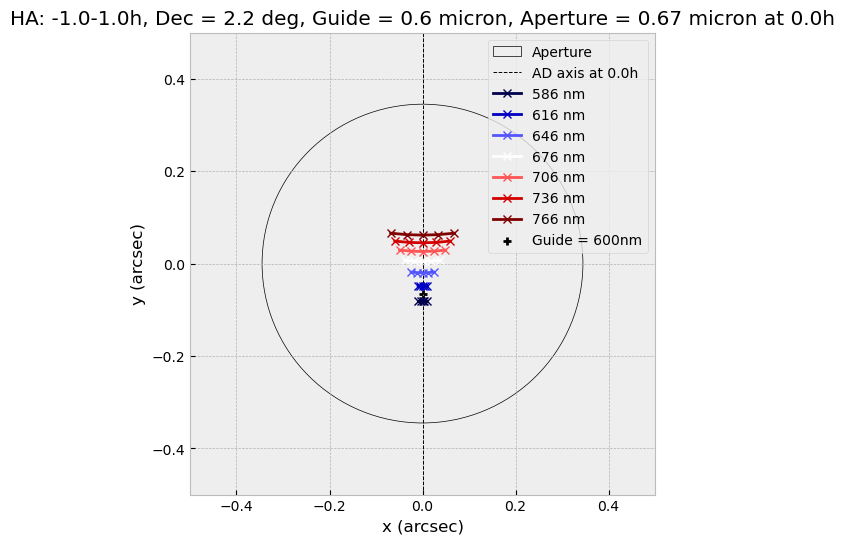

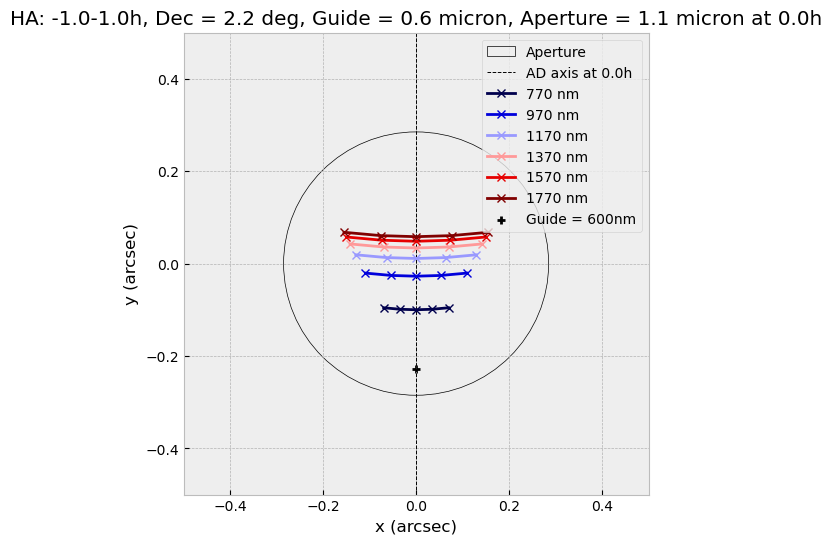

In [4]:
analysis=AD_analysis()
HA_range=np.linspace(-1,1,21)
targ_dec=2.2*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.51]*u.micron
aperture_R=[.67]*u.micron
aperture_NIR=[1.1]*u.micron
guide=.6*u.micron

analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring)
plt.title("HA {}-{}, Dec = {} (COSMOS), Guide = {}, Centre at = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm)
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm)
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

## UDS

Target goes below Horizon above/below HA of +/- 6.2h
Target goes below Horizon above/below HA of +/- 6.2h
Target goes below Horizon above/below HA of +/- 6.2h
Target goes below Horizon above/below HA of +/- 6.2h
Target goes below Horizon above/below HA of +/- 6.2h


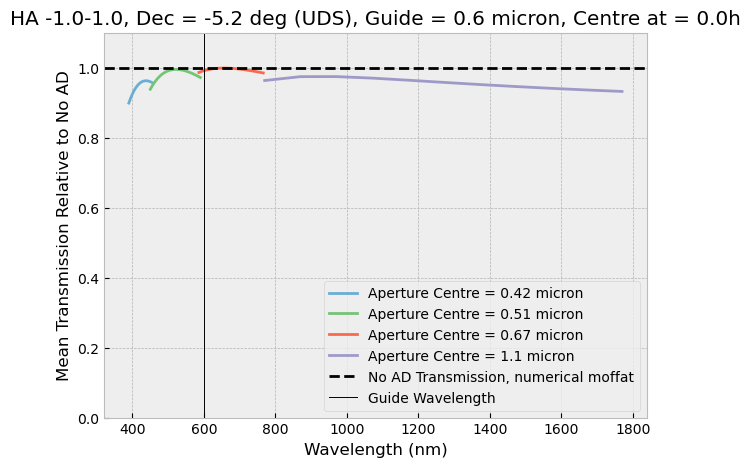

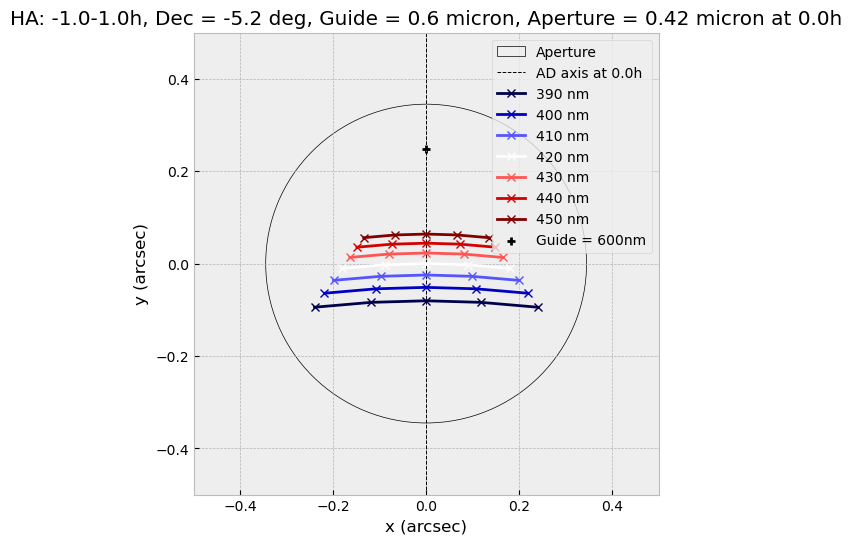

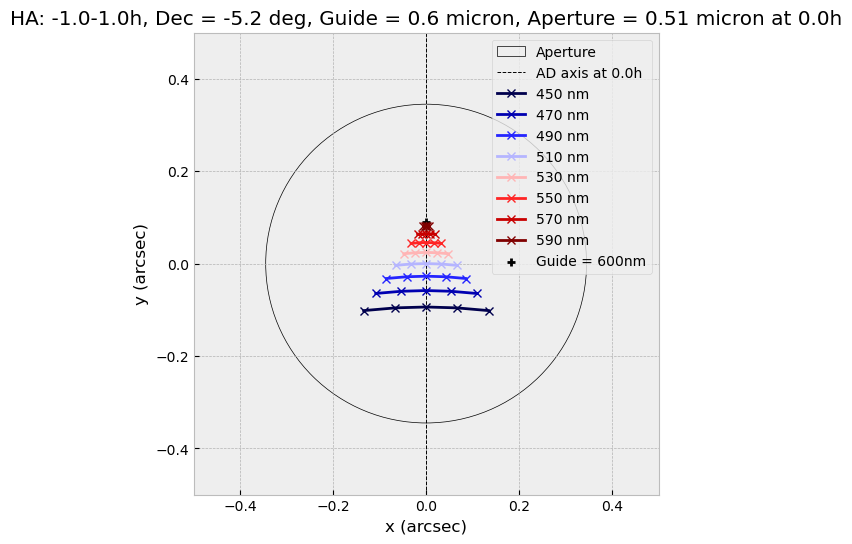

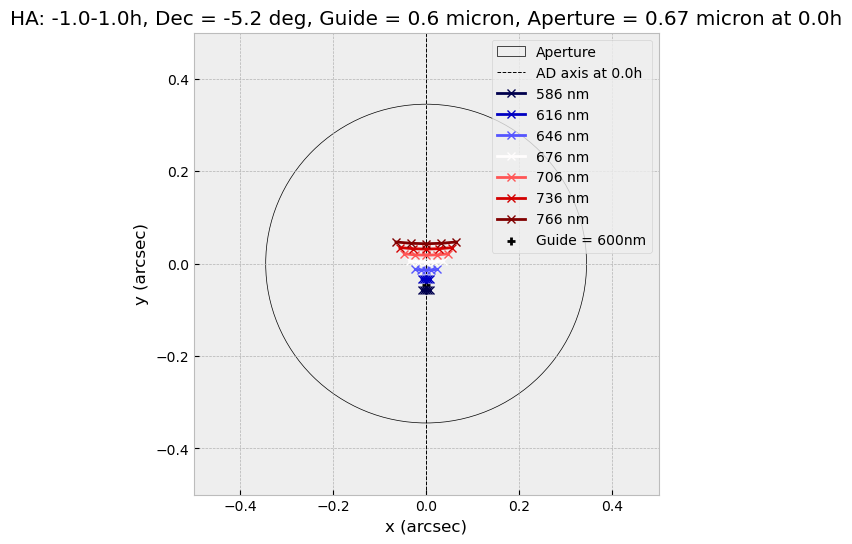

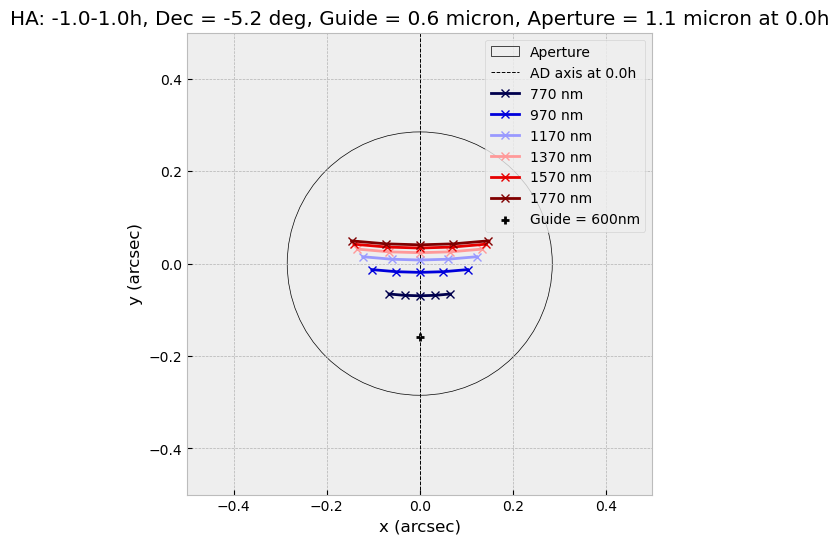

In [5]:
analysis=AD_analysis()
HA_range=np.linspace(-1,1,21)
targ_dec=-5.2*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.51]*u.micron
aperture_R=[.67]*u.micron
aperture_NIR=[1.1]*u.micron
guide=.6*u.micron

analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring)
plt.title("HA {}-{}, Dec = {} (UDS), Guide = {}, Centre at = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

## SMC

/Users/Jay.Stephan/Library/CloudStorage/OneDrive-ScienceandTechnologyFacilitiesCouncil/Documents/Work/MOSAIC/AD/AD-Code/Main-Version/AD_analysis.py:147: RuntimeWarning: invalid value encountered in arccos
  LHA_below_horizon=np.rad2deg(np.arccos(-np.tan(lat)*np.tan(dec)))/15


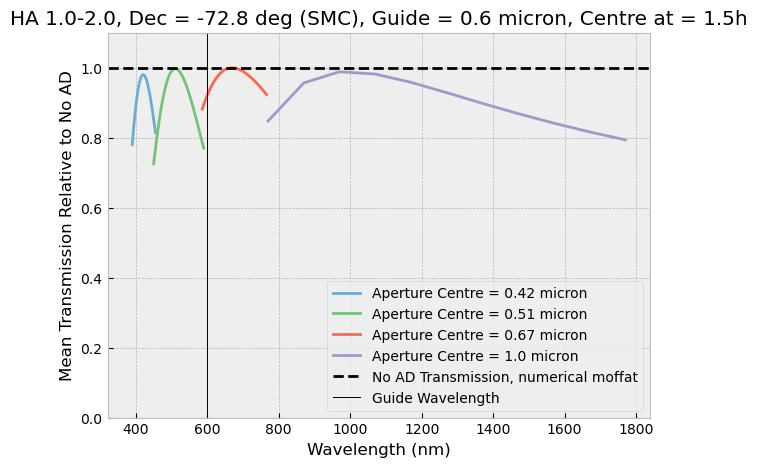

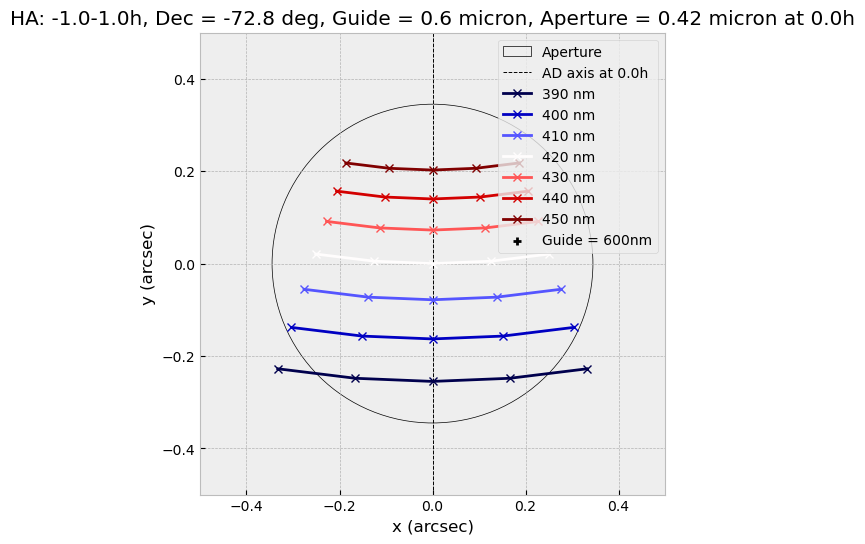

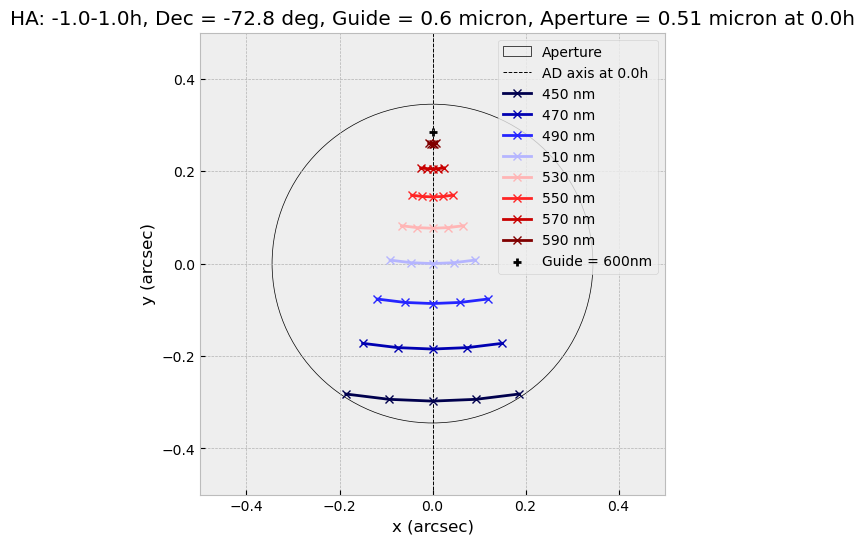

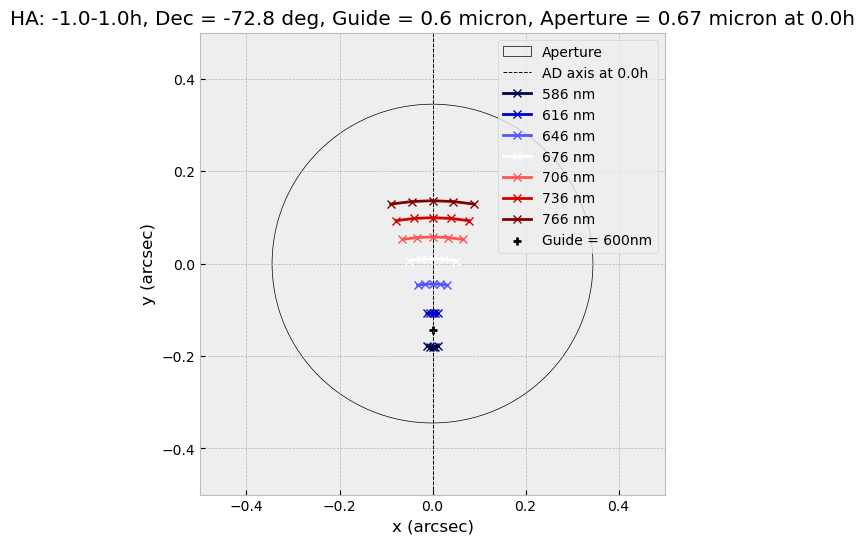

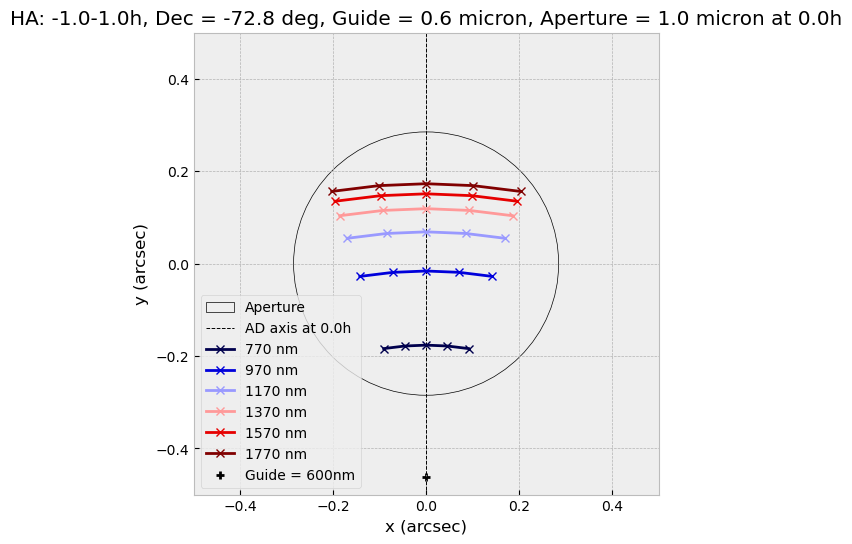

In [6]:
analysis=AD_analysis()
HA_range=np.linspace(1,2,21)
targ_dec=-72.8*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.51]*u.micron
aperture_R=[.67]*u.micron
aperture_NIR=[1]*u.micron
guide=.6*u.micron

analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring,parallatic=True,VIS_diameter=.72*u.arcsec)
plt.title("HA {}-{}, Dec = {} (SMC), Guide = {}, Centre at = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

analysis=AD_analysis()
analysis.load_band('LR','VIS','B','B',sampling=10*u.nm)
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm) 
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

## LMC

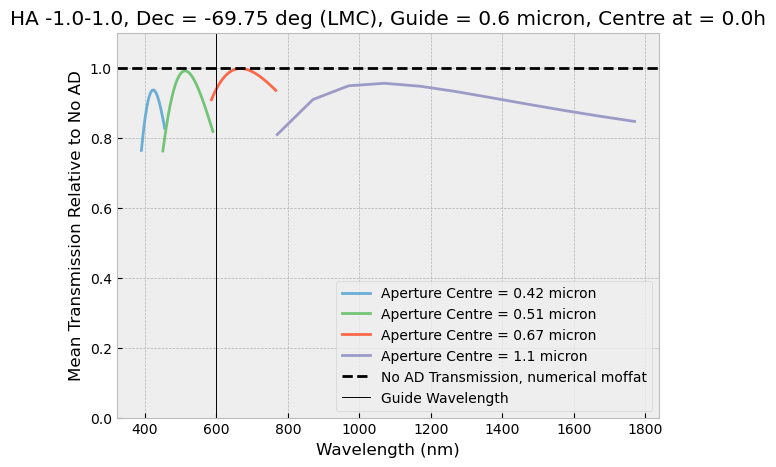

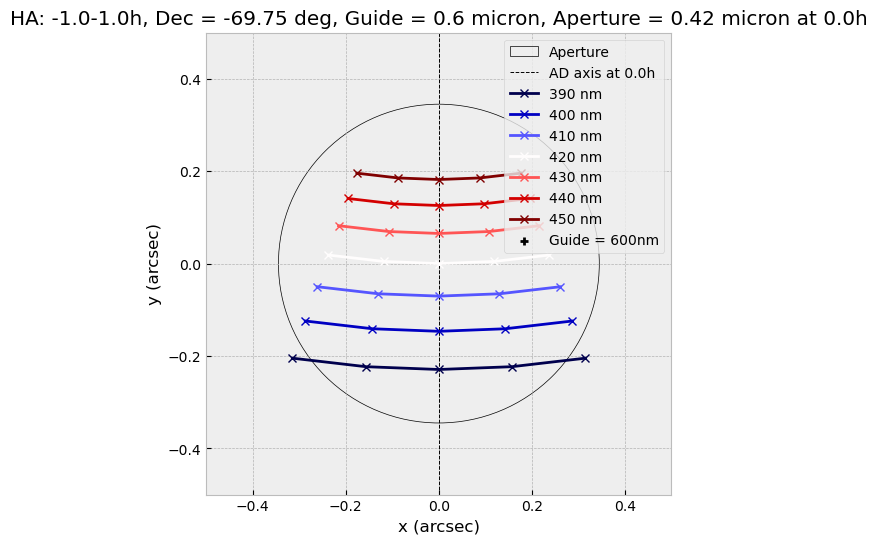

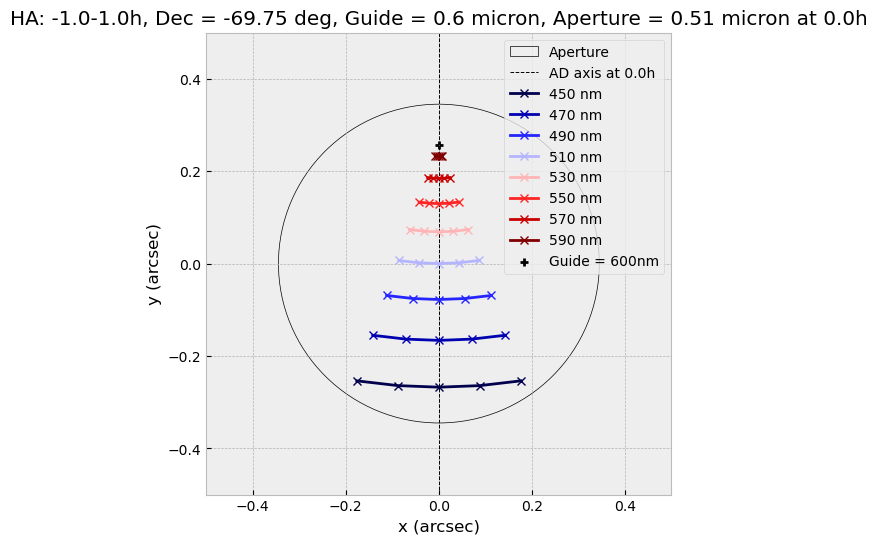

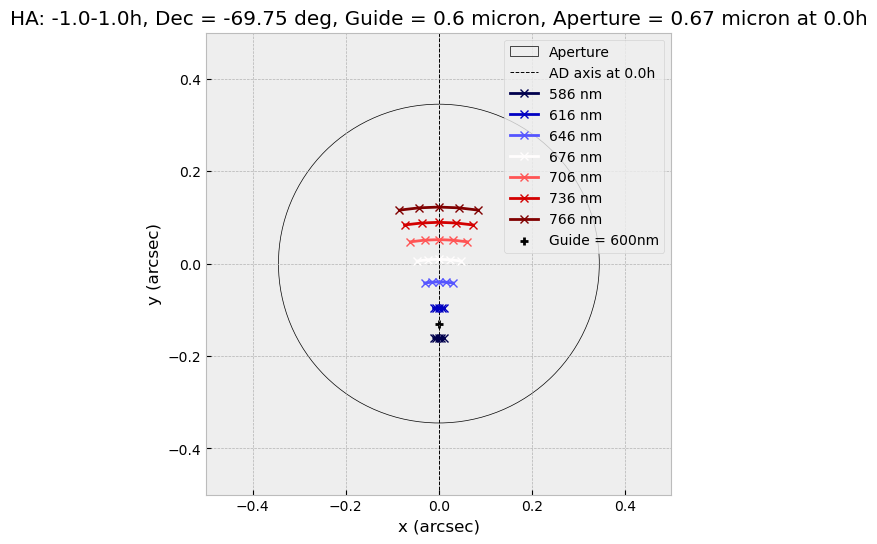

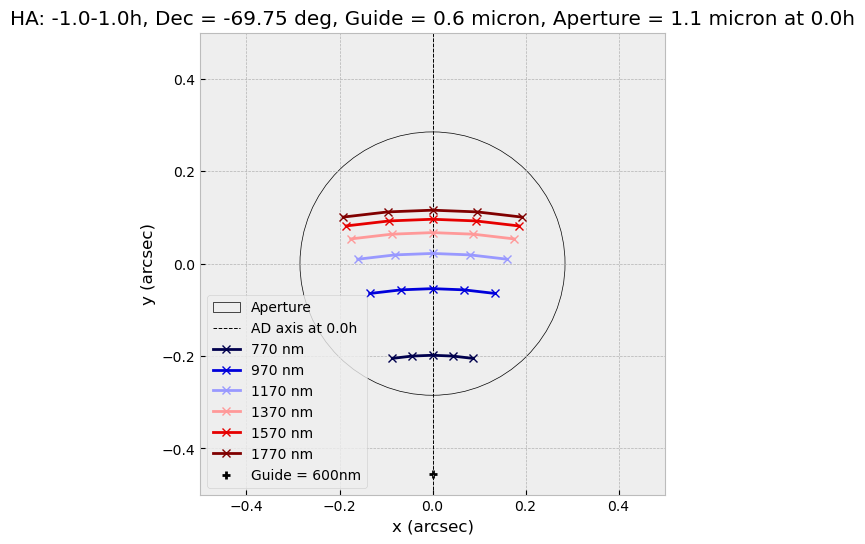

In [7]:
analysis=AD_analysis()
HA_range=np.linspace(-1,1,21)
targ_dec=-69.75*u.deg
centring="mid HA"
aperture_B=[.42]*u.micron
aperture_V=[.51]*u.micron
aperture_R=[.67]*u.micron
aperture_NIR=[1.1]*u.micron
guide=.6*u.micron

analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_integ_trans_parallel(analysis,aperture_B,aperture_V,aperture_R,aperture_NIR,guide,method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring)
plt.title("HA {}-{}, Dec = {} (LMC), Guide = {}, Centre at = {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

analysis.load_band('LR','VIS','B','B',sampling=10*u.nm)
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_B[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','V','V',sampling=20*u.nm)
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_V[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','VIS','R','R',sampling=30*u.nm)
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_R[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm)
analysis.load_airmasses(HA_range=np.linspace(-1,1,5),targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

# Optimisation (WIP)

In [8]:
#Following function plots integration transmission average for actual parallel observing modes
def plot_integ_trans_parallel_1VIS_NIR(analysis,aperture_VIS,aperture_NIR,guide,VIS_band,normalise="no AD",method="numerical moffat",aperture="circle",sample_val=[1*u.nm,1*u.nm],scale_val=0.01,parallatic=True,centring="mid HA",VIS_diameter=0.72*u.arcsec):  
    weights_VIS = np.arange(0, len(aperture_VIS)+2)
    norm_VIS = mpl.colors.Normalize(vmin=min(weights_VIS), vmax=max(weights_VIS))
    cmap_VIS = mpl.cm.ScalarMappable(norm=norm_VIS, cmap=mpl.cm.Blues)

    weights_NIR = np.arange(0, len(aperture_NIR)+2)
    norm_NIR = mpl.colors.Normalize(vmin=min(weights_NIR), vmax=max(weights_NIR))
    cmap_NIR= mpl.cm.ScalarMappable(norm=norm_NIR, cmap=mpl.cm.Reds)
       
    analysis.load_band("LR","VIS",VIS_band,VIS_band,sampling=sample_val[0])
    analysis.output['aperture_diameter']=VIS_diameter
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_VIS,guide,parallatic,centring)
    
    plt.figure(figsize=[7,5])
    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='Aperture Centre = {}'.format(aperture_VIS[count]),color=cmap_VIS.to_rgba(len(aperture_VIS)-count))
        plt.plot(analysis.output['wavelengths'],opt_transmission,color='black',linestyle='--')
        
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_VIS[count]),color=cmap_VIS.to_rgba(len(aperture_VIS)-count))

    analysis.load_band("LR","NIR","IY","H",sampling=sample_val[1])
    analysis.make_aperture(aperture,method,scale_val)
    integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,aperture_NIR,guide,parallatic,centring)

    if normalise == "none":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i),label='Aperture Centre = {}'.format(aperture_NIR[count]),color=cmap_NIR.to_rgba(len(aperture_NIR)-count))
        plt.ylabel("Mean Transmission")        
        plt.plot(analysis.output['wavelengths'],opt_transmission,label='No AD Transmission',color='black',linestyle='--')
    if normalise == "no AD":
        for count,i in enumerate(integ_transmissions):
            plt.plot(analysis.output['wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {}'.format(aperture_NIR[count]),color=cmap_NIR.to_rgba(len(aperture_NIR)-count))
        plt.axhline(y=1,label='No AD Transmission, {}'.format(analysis.input['method']),color='black',linestyle='--')
        plt.ylabel("Mean Transmission Relative to No AD")
        
    plt.ylim(0,1.1)
    plt.xlabel("Wavelength (nm)")
    plt.axvline(x=guide.value*1000,color='black',linewidth=0.7,label='Guide Wavelength')
    #if analysis.input['HA_range'] != []:
        #plt.title("Guide = {}, HA {}-{}, Dec = {}, Centre at = {}h".format(guide,analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],analysis.input['HA_range'][analysis.input['centred_on']]))
    plt.legend()

In [9]:
def optimise_parallel(analysis,guide_options,VIS_aperture_centre_options,NIR_aperture_centre_options,VIS_band,centring="mid HA",scale_val=0.01):
    analysis.load_band('LR','VIS',VIS_band,VIS_band,sampling=5*u.nm)
    analysis.make_aperture("hexagons",method="numerical moffat",scale=scale_val)
    VIS_metrics=[] #will be of the form [[[G1 A1 min, max, mean],[G1 A2 min, max, mean]...][[G2 A1 min, max, mean...]...]...]
    #first index is guide, second index is aperture centre, third index in min, max, or mean
    for guide in guide_options:
        integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,VIS_aperture_centre_options,guide,parallatic=True,centring=centring)
        VIS_metrics.append(int_analysis.integ_metric(np.array(integ_transmissions)/np.array(opt_transmission),"all"))
    
    analysis.load_band('LR','NIR','IY','H',sampling=100*u.nm) 
    analysis.make_aperture("hexagons",method="numerical moffat",scale=scale_val)
    NIR_metrics=[] #will be of the form [[[G1 A1 min, max, mean],[G1 A2 min, max, mean]...][[G2 A1 min, max, mean...]...]...]
    #first index is guide, second index is aperture centre, third index in min, max, or mean
    for guide in guide_options:
        integ_transmissions,opt_transmission=int_analysis.integ_trans(analysis,NIR_aperture_centre_options,guide,parallatic=True,centring=centring)
        NIR_metrics.append(int_analysis.integ_metric(np.array(integ_transmissions)/np.array(opt_transmission),"all"))
    
    #Need to go through each guide and each permutation of VIS and NIR
    performance_metrics=[]
    for i in range(0,len(guide_options)):
        metric_outer=[]
        for o in range(0,len(VIS_aperture_centre_options)):
            metric_inner=[]
            for p in range(0,len(NIR_aperture_centre_options)):
                VIS_min=VIS_metrics[i][o][0]
                VIS_max=VIS_metrics[i][o][1]
                VIS_mean=VIS_metrics[i][o][2]
                
                NIR_min=NIR_metrics[i][p][0]
                NIR_max=NIR_metrics[i][p][1]
                NIR_mean=NIR_metrics[i][p][2]
      
                metric=(VIS_min/VIS_max)*VIS_mean*(NIR_min/NIR_max)*NIR_mean
                metric_inner.append(metric)
            metric_outer.append(metric_inner)
            
        performance_metrics.append(metric_outer)
    
    best_metric=0
    for i in range(0,len(guide_options)):
        for o in range(0,len(VIS_aperture_centre_options)):
            for p in range(0,len(NIR_aperture_centre_options)):
                if performance_metrics[i][o][p]>best_metric:
                    best_metric=performance_metrics[i][o][p]
                    best_guide=guide_options[i]
                    best_VIS_aperture=VIS_aperture_centre_options[o]
                    best_NIR_aperture=NIR_aperture_centre_options[p]
    
    return best_guide,best_VIS_aperture,best_NIR_aperture,best_metric

In [10]:
VIS_B=[.390,.458]
VIS_V=[.450,.591] 
VIS_R=[.586,.770]
NIR_All=[.770,1.857]

## VIS B + NIR All

Target goes below Horizon above/below HA of +/- 5.9h


/opt/anaconda3/envs/astrocondatest/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h


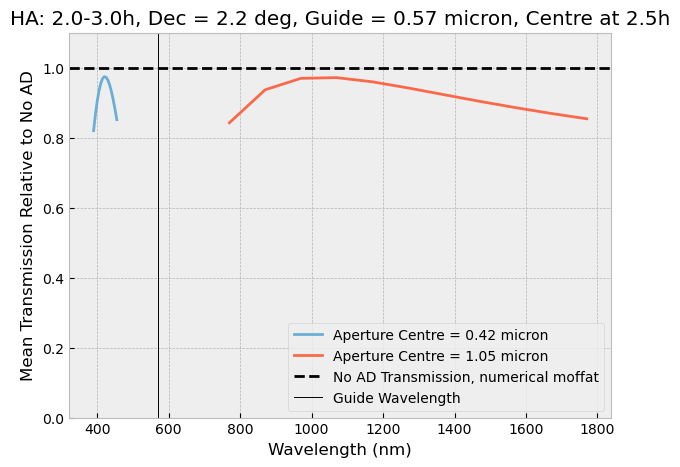

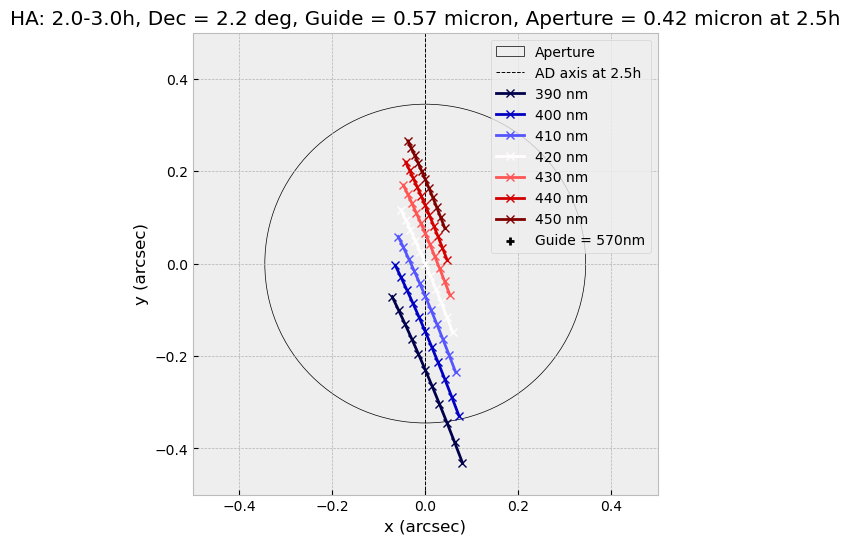

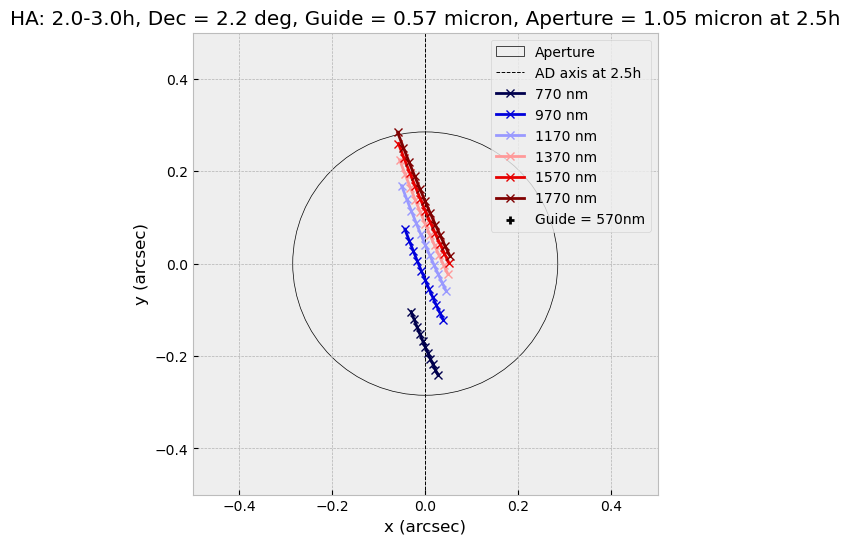

In [11]:
HA_range=np.linspace(2,3,11)
targ_dec=2.2*u.deg
centring="mid HA"

analysis=AD_analysis()
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)

best_guide,best_VIS_aperture,best_NIR_aperture,best_metric=optimise_parallel(analysis,np.arange(.4,1,.01)*u.micron,np.arange(VIS_B[0],VIS_B[1],.01)*u.micron,np.arange(.8,1.5,.05)*u.micron,'B',scale_val=0.1)

aperture_VIS=[round(best_VIS_aperture.value,2)]*u.micron
aperture_NIR=[round(best_NIR_aperture.value,2)]*u.micron
guide=round(best_guide.value,2)*u.micron

analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_integ_trans_parallel_1VIS_NIR(analysis,aperture_VIS,aperture_NIR,guide,"B",method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring,VIS_diameter=0.72*u.arcsec)
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Centre at {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

analysis.load_band('LR','VIS','B','B',sampling=10*u.nm)
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_VIS[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm)
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

## VIS G/V + NIR All

Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h
Target goes below Horizon above/below HA of +/- 5.9h


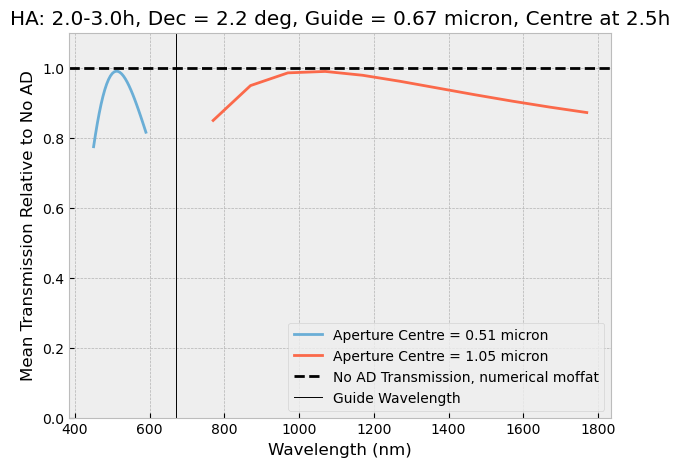

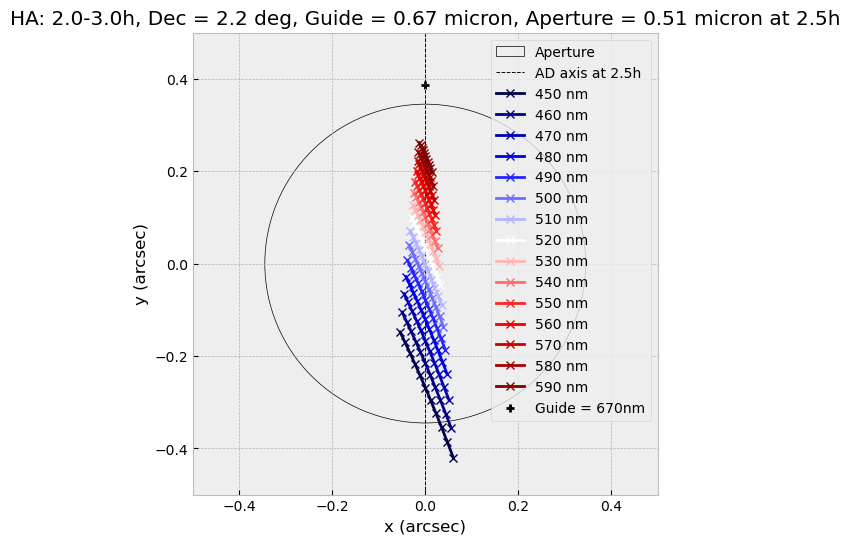

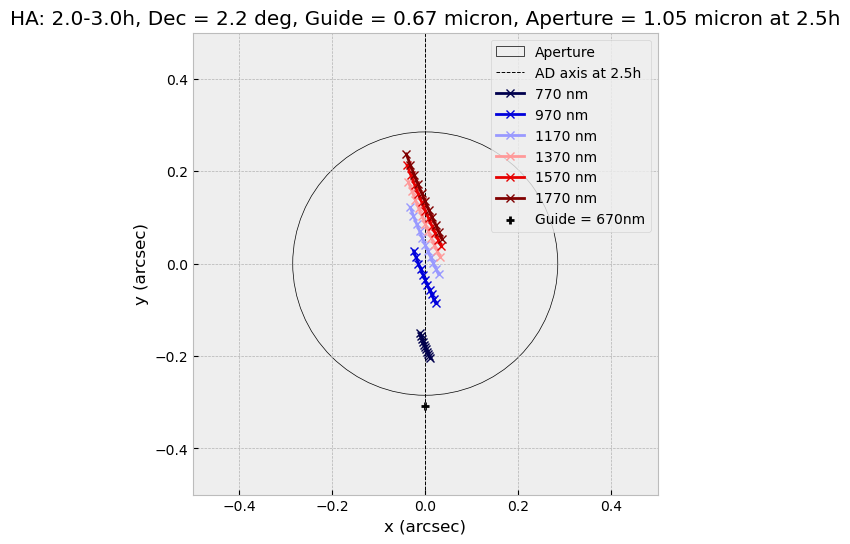

In [12]:
HA_range=np.linspace(2,3,11)
targ_dec=2.2*u.deg
centring="mid HA"

analysis=AD_analysis()
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)

best_guide,best_VIS_aperture,best_NIR_aperture,best_metric=optimise_parallel(analysis,np.arange(.4,1,.01)*u.micron,np.arange(VIS_V[0],VIS_V[1],.01)*u.micron,np.arange(.8,1.5,.05)*u.micron,'V',scale_val=0.1)

aperture_VIS=[round(best_VIS_aperture.value,2)]*u.micron
aperture_NIR=[round(best_NIR_aperture.value,2)]*u.micron
guide=round(best_guide.value,2)*u.micron

analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_integ_trans_parallel_1VIS_NIR(analysis,aperture_VIS,aperture_NIR,guide,"V",method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring,VIS_diameter=0.72*u.arcsec)
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Centre at {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

analysis.load_band('LR','VIS','V','V',sampling=10*u.nm)
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_VIS[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm)
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

## VIS R + NIR All

In [13]:
HA_range=np.linspace(2,3,11)
targ_dec=-70*u.deg
centring="mid HA"

analysis=AD_analysis()
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)

best_guide,best_VIS_aperture,best_NIR_aperture,best_metric=optimise_parallel(analysis,np.arange(.4,1,.01)*u.micron,np.arange(VIS_R[0],VIS_R[1],.01)*u.micron,np.arange(.8,1.5,.05)*u.micron,'R',scale_val=0.1)

aperture_VIS=[round(best_VIS_aperture.value,2)]*u.micron
aperture_NIR=[round(best_NIR_aperture.value,2)]*u.micron
guide=round(best_guide.value,2)*u.micron

analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
plot_integ_trans_parallel_1VIS_NIR(analysis,aperture_VIS,aperture_NIR,guide,"R",method="numerical moffat",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring,VIS_diameter=0.72*u.arcsec)
plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Centre at {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

# analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
# plot_integ_trans_parallel_1VIS_NIR(analysis,aperture_VIS,aperture_NIR,guide,"R",method="numerical durham",aperture="hexagons",sample_val=[5*u.nm,100*u.nm],centring=centring,VIS_diameter=0.72*u.arcsec)
# plt.title("HA: {}-{}h, Dec = {}, Guide = {}, Centre at {}".format(analysis.input['HA_range'][0],analysis.input['HA_range'][-1],analysis.input['targ_dec'],guide,analysis.input['centred_on']))

analysis.load_band('LR','VIS','R','R',sampling=10*u.nm)
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_VIS[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")

analysis=AD_analysis()
analysis.load_band('LR','NIR','IY','H',sampling=200*u.nm)
analysis.load_airmasses(HA_range=HA_range,targ_dec=targ_dec)
analysis.calculate_shifts(guide,aperture_NIR[0],centring="mid HA")
int_analysis.track_plot(analysis,y_axis="centring")